In [3]:
!pip install sentence-transformers turkish-nlp

ERROR: Could not find a version that satisfies the requirement turkish-nlp (from versions: none)
ERROR: No matching distribution found for turkish-nlp

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
!pip install matplotlib


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Text 1: Cumhurbaşkanı Tayyip Erdoğan, Suudi Arabistan, Katar ve Birleşik Arap Emirlikleri’ni kapsayan Körfez turu sonrasında uçakta gazetecilerin sorularını yanıtladı. Hükümetin ekonomi politikaları nedeniyle hızla artan konut fiyatları ve kiralarla ilgili konuşan Erdoğan, ceza uygulayacaklarını söyledi ve boş evlere de vergi gelebileceği sinyali verdi.
Text 2: "Başkan Recep Tayyip Erdoğan Körfez turu sonrası gazetecilerle söyleşi gerçekleştirdi. Ekonomi gündemine ilişkin önemli açıklamalarda bulunan Erdoğan emekli maaşı zammı konusunda tarih vererek yeniden değerlendirileceğini açıkladı. Başkan Erdoğan, "Memura, işçiye ve emekliye bütçe şartlarını zorlayarak yapabileceğimiz en iyi zammı yaptık. Kimseyi enflasyona ezdirmeyeceğimize dair söz verdik ve şu ana kadar da ezdirmedik" dedi. Yüksek kira fiyatları ile ilgili ise Erdoğan, "Vatandaşlarımızı açgözlü bir avuç azınlığın kar hırsına kurban edemeyiz. Vatandaşımızın alım gücünü düşürmemek, enflasyona ezdirmemek için yaptığımız zamlara 

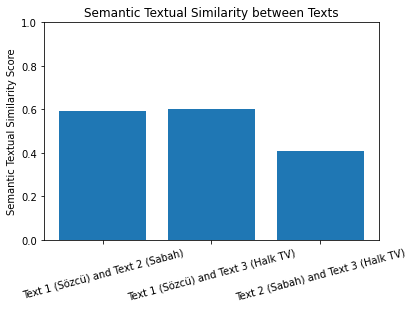

In [11]:
from sentence_transformers import SentenceTransformer, util
from TurkishStemmer import TurkishStemmer
import matplotlib.pyplot as plt

# Function to preprocess the text
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove special characters and numbers
    text = ''.join(char for char in text if char.isalnum() or char.isspace())
    return text

# Turkish Stemmer
turkish_stemmer = TurkishStemmer()

# Input texts
text1 = "Cumhurbaşkanı Tayyip Erdoğan, Suudi Arabistan, Katar ve Birleşik Arap Emirlikleri’ni kapsayan Körfez turu sonrasında uçakta gazetecilerin sorularını yanıtladı. Hükümetin ekonomi politikaları nedeniyle hızla artan konut fiyatları ve kiralarla ilgili konuşan Erdoğan, ceza uygulayacaklarını söyledi ve boş evlere de vergi gelebileceği sinyali verdi."
text2 = "\"Başkan Recep Tayyip Erdoğan Körfez turu sonrası gazetecilerle söyleşi gerçekleştirdi. Ekonomi gündemine ilişkin önemli açıklamalarda bulunan Erdoğan emekli maaşı zammı konusunda tarih vererek yeniden değerlendirileceğini açıkladı. Başkan Erdoğan, \"Memura, işçiye ve emekliye bütçe şartlarını zorlayarak yapabileceğimiz en iyi zammı yaptık. Kimseyi enflasyona ezdirmeyeceğimize dair söz verdik ve şu ana kadar da ezdirmedik\" dedi. Yüksek kira fiyatları ile ilgili ise Erdoğan, \"Vatandaşlarımızı açgözlü bir avuç azınlığın kar hırsına kurban edemeyiz. Vatandaşımızın alım gücünü düşürmemek, enflasyona ezdirmemek için yaptığımız zamlara göz diken ev sahipleri bunun bedelini ödemek zorunda kalacak. Hangi konuda olursa olsun fahiş fiyat artışlarına giden, piyasanın dengesini bozan yaptığı davranışın cezasını çekecektir\" dedi."
text3 = "Cumhurbaşkanı Recep Tayyip Erdoğan, Körfez turunu tamamladı. Suudi Arabistan, Katar, Birleşik Arap Emirlikleri ve Kuzey Kıbrıs Türk Cumhuriyeti (KKTC) ziyareti dönüşünde uçakta gazetecilerin sorularını yanıtlayan Erdoğan, dış politikadan memur zamlarına kadar gündemdeki pek çok soruyu yanıtladı."

# Preprocess the texts
preprocessed_text1 = preprocess_text(text1)
preprocessed_text2 = preprocess_text(text2)
preprocessed_text3 = preprocess_text(text3)

# Tokenize and stem the texts (optional step for Turkish text)
tokens1 = turkish_stemmer.stem(preprocessed_text1).split()
tokens2 = turkish_stemmer.stem(preprocessed_text2).split()
tokens3 = turkish_stemmer.stem(preprocessed_text3).split()

# Convert back to text
processed_text1 = " ".join(tokens1)
processed_text2 = " ".join(tokens2)
processed_text3 = " ".join(tokens3)

# Load the Sentence Transformers model
model_name = "paraphrase-multilingual-MiniLM-L12-v2"
model = SentenceTransformer(model_name)

# Encode the texts into sentence embeddings
embedding1 = model.encode([processed_text1], convert_to_tensor=True)
embedding2 = model.encode([processed_text2], convert_to_tensor=True)
embedding3 = model.encode([processed_text3], convert_to_tensor=True)

# Compute the cosine similarity score between the embeddings
similarity_score_1_2 = util.pytorch_cos_sim(embedding1, embedding2)[0][0].item()
similarity_score_1_3 = util.pytorch_cos_sim(embedding1, embedding3)[0][0].item()
similarity_score_2_3 = util.pytorch_cos_sim(embedding2, embedding3)[0][0].item()

print("Text 1:", text1)
print("Text 2:", text2)
print("Text 3:", text3)
print("Semantic Textual Similarity Score between Text 1 and Text 2:", similarity_score_1_2)
print("Semantic Textual Similarity Score between Text 1 and Text 3:", similarity_score_1_3)
print("Semantic Textual Similarity Score between Text 2 and Text 3:", similarity_score_2_3)

# Plot the similarity scores
texts = ['Text 1 (Sözcü) and Text 2 (Sabah)', 'Text 1 (Sözcü) and Text 3 (Halk TV)', 'Text 2 (Sabah) and Text 3 (Halk TV)']
scores = [similarity_score_1_2, similarity_score_1_3, similarity_score_2_3]

plt.bar(texts, scores)
plt.ylim(0, 1.0)
plt.ylabel('Semantic Textual Similarity Score')
plt.title('Semantic Textual Similarity between Texts')
plt.xticks(rotation=15)  # To avoid overlapping text on x-axis
plt.show()



